In [42]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import mode
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import statsmodels.api as sm
import statsmodels.formula.api as smf 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
import imblearn.over_sampling

In [43]:
!pip install imblearn

In [44]:
pwd

'/home/ubuntu/Notebooks/lending-club'

In [45]:
df = pd.read_csv('deleted_cols.csv')


In [46]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,MORTGAGE,NONE,OWN,RENT
0,0,1077501,1296599,5000.0,5000.0,4975.000000,36,10.65,162.87,B,...,0.00,0.00,0.0000,171.62,1.0,INDIVIDUAL,0,0,0,1
1,1,1077430,1314167,2500.0,2500.0,2500.000000,60,15.27,59.83,C,...,0.00,117.08,1.1100,119.66,1.0,INDIVIDUAL,0,0,0,1
2,2,1077175,1313524,2400.0,2400.0,2400.000000,36,15.96,84.33,C,...,0.00,0.00,0.0000,649.91,1.0,INDIVIDUAL,0,0,0,1
3,3,1076863,1277178,10000.0,10000.0,10000.000000,36,13.49,339.31,C,...,16.97,0.00,0.0000,357.48,1.0,INDIVIDUAL,0,0,0,1
4,4,1075358,1311748,3000.0,3000.0,3000.000000,60,12.69,67.79,B,...,0.00,0.00,0.0000,67.79,1.0,INDIVIDUAL,0,0,0,1
5,5,1075269,1311441,5000.0,5000.0,5000.000000,36,7.90,156.46,A,...,0.00,0.00,0.0000,161.03,1.0,INDIVIDUAL,0,0,0,1
6,6,1069639,1304742,7000.0,7000.0,7000.000000,60,15.96,170.08,C,...,0.00,0.00,0.0000,170.08,1.0,INDIVIDUAL,0,0,0,1
7,7,1072053,1288686,3000.0,3000.0,3000.000000,36,18.64,109.43,E,...,0.00,0.00,0.0000,111.34,1.0,INDIVIDUAL,0,0,0,1
8,8,1071795,1306957,5600.0,5600.0,5600.000000,60,21.28,152.39,F,...,0.00,189.06,2.0900,152.39,1.0,INDIVIDUAL,0,0,1,0
9,9,1071570,1306721,5375.0,5375.0,5350.000000,60,12.69,121.45,B,...,0.00,269.29,2.5200,121.45,1.0,INDIVIDUAL,0,0,0,1


In [47]:
#Delete Unnamed column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [48]:
#Conver earliest_cr_line and issue_d to datetime

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

df['issue_d'] = pd.to_datetime(df['issue_d'])

In [49]:
df.shape

(858049, 45)

In [50]:
#The list of columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'MORTGAGE', 'NONE', 'OWN', 'RENT'],
      dtype='object')

To prepare the dataframe for analysis, I will shuffle the data and then use test_train_split.

In [51]:
#Shuffle dataframe
df = shuffle(df, random_state = 1)

In [52]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,MORTGAGE,NONE,OWN,RENT
694270,51848807,55278581,20000.0,20000.0,20000.0,36,9.99,645.25,B,B3,...,0.0,0.0,0.0,645.25,1.0,INDIVIDUAL,1,0,0,0
34973,442381,537306,20000.0,20000.0,19050.0,36,14.26,686.12,C,C5,...,0.0,0.0,0.0,18372.64,1.0,INDIVIDUAL,1,0,0,0
226795,37692106,40465191,28000.0,28000.0,28000.0,60,10.49,601.70,B,B3,...,0.0,0.0,0.0,24652.44,1.0,INDIVIDUAL,1,0,0,0
382048,16101417,18203903,6000.0,6000.0,6000.0,36,10.15,194.03,B,B2,...,0.0,0.0,0.0,5315.97,1.0,INDIVIDUAL,0,0,1,0
785277,42673919,45670681,12000.0,12000.0,12000.0,60,16.99,298.17,D,D3,...,0.0,0.0,0.0,298.17,1.0,INDIVIDUAL,1,0,0,0


In [53]:
df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,MORTGAGE,NONE,OWN,RENT
id,1.000000,0.999434,0.065409,0.067711,0.073203,0.071534,-0.144219,0.025890,0.034185,0.067231,...,-0.455668,-0.077732,-0.115011,-0.073086,-0.227535,NaN,-0.008937,-0.009703,0.038347,-0.014025
member_id,0.999434,1.000000,0.066083,0.068426,0.074029,0.071881,-0.143449,0.026594,0.034360,0.067282,...,-0.454730,-0.078209,-0.115091,-0.073076,-0.226971,NaN,-0.008355,-0.009846,0.038362,-0.014626
loan_amnt,0.065409,0.066083,1.000000,0.999242,0.997052,0.411089,0.142521,0.944925,0.335102,0.020637,...,0.537553,0.024256,0.074872,0.053514,0.233791,NaN,0.192104,-0.000544,-0.020734,-0.183427
funded_amnt,0.067711,0.068426,0.999242,1.000000,0.997986,0.410095,0.142648,0.945983,0.334864,0.021040,...,0.536471,0.023848,0.074411,0.053273,0.233331,NaN,0.191909,-0.000533,-0.020544,-0.183344
funded_amnt_inv,0.073203,0.074029,0.997052,0.997986,1.000000,0.410734,0.142663,0.943562,0.333811,0.022139,...,0.533935,0.020299,0.072472,0.050711,0.232100,NaN,0.191720,-0.000947,-0.020034,-0.183454
term,0.071534,0.071881,0.411089,0.410095,0.410734,1.000000,0.426874,0.143969,0.058948,0.050381,...,0.383700,0.001105,0.058806,0.036891,0.074036,NaN,0.108982,-0.002338,-0.014494,-0.102371
int_rate,-0.144219,-0.143449,0.142521,0.142648,0.142663,0.426874,1.000000,0.130125,-0.073623,0.078458,...,0.446444,0.050666,0.110417,0.073321,0.107251,NaN,-0.060560,0.003117,0.001961,0.060559
installment,0.025890,0.026594,0.944925,0.945983,0.943562,0.143969,0.130125,1.000000,0.328567,0.014322,...,0.502121,0.034251,0.076407,0.055744,0.243415,NaN,0.159762,0.000750,-0.016923,-0.152759
annual_inc,0.034185,0.034360,0.335102,0.334864,0.333811,0.058948,-0.073623,0.328567,1.000000,-0.086619,...,0.130747,0.009986,0.007827,0.006806,0.092570,NaN,0.157110,-0.001289,-0.031553,-0.141136
dti,0.067231,0.067282,0.020637,0.021040,0.022139,0.050381,0.078458,0.014322,-0.086619,1.000000,...,0.008852,-0.006830,0.001501,0.002421,-0.028476,NaN,-0.002926,0.000186,0.014932,-0.006086


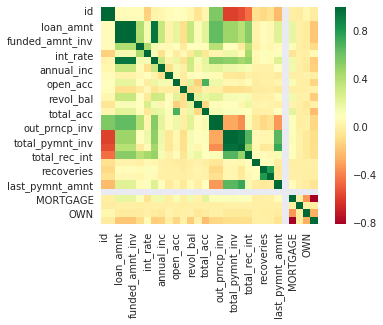

In [54]:
#Correlation Heatmap

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [55]:
df.shape

(858049, 45)

In [56]:
pwd

'/home/ubuntu/Notebooks/lending-club'

#### Analyzing Target

In [57]:
df['loan_status'].value_counts()

Current    810913
Default     47136
Name: loan_status, dtype: int64

In [58]:
loans_df = df['loan_status']
loans_df.head()

694270    Current
34973     Current
226795    Current
382048    Current
785277    Current
Name: loan_status, dtype: object

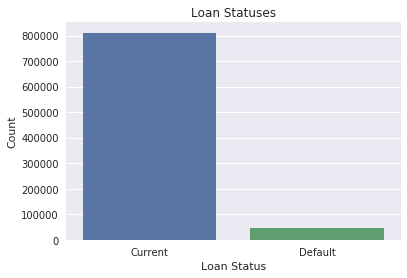

In [59]:
ax = sns.countplot(loans_df)
ax.set(xlabel='Loan Status', ylabel='Count')
plt.title('Loan Statuses')
plt.show()

In [60]:
#Convert loan_status labels to 0 for Default and 1 for Current
df['loan_status'] = df['loan_status'].replace({'Current': 0, 'Default': 1})

In [61]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'MORTGAGE', 'NONE', 'OWN', 'RENT'],
      dtype='object')

In [62]:
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                         int64
pymnt_plan                         object
url                                object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
earliest_cr_line           datetime64[ns]
open_acc                          

### Define Variables - Using All Features that were relevant before the loan was issued



In [63]:
X = df[['id', 'int_rate', 'loan_amnt', 'annual_inc', 'dti',
       'revol_bal', 'revol_util', 'open_acc', 'term', 'pub_rec']]
y = df['loan_status']

Text(0.5,1,'Heatmap of Features')

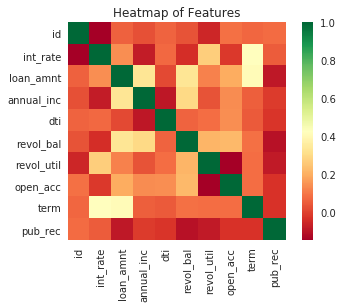

In [64]:
sns.heatmap(X.corr(), square=True, cmap='RdYlGn').set_title('Heatmap of Features')


In [65]:
#Test_train_split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20, random_state=1)

In [66]:
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
#Apply the scaler to the train set
X_tr = std.transform(X_train)

#Apply the scaler to the test set
X_te = std.transform(X_test)

## Logistic Regression Using Statsmodels

In [68]:
model = sm.Logit(y_train,X_tr)
results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.686349
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:               686439
Model:                          Logit   Df Residuals:                   686429
Method:                           MLE   Df Model:                            9
Date:                Wed, 21 Feb 2018   Pseudo R-squ.:                  -2.227
Time:                        11:02:53   Log-Likelihood:            -4.7114e+05
converged:                       True   LL-Null:                   -1.4600e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1850      0.003    -73.138      0.000      -0.190      -0.180
x2             0.1181      0.003     40.588      0.000       0.112       0.124
x3            -0.0016      0.003     -0.545      0.586      -0.008       0.004
x4            -0.0198      0.003     -6.045      0.000      -0.026      -0.013
x5             0.0084      0.005      1.525      0.127      -0.002       0.019
x6            -0.0003      0.003     -0.092      0.926      -0.006       0.005
x7            -0.0003      0.003     -0.103      0.918      -0.006       0.005
x8            -0.0006      0.003     -0.228      0.820      -0.006       0.005
x9            -0.0087      0.003     -2.942      0.003      -0.014      -0.003
x10           -0.0095      0.002     -3.833      0.000      -0.014      -0.005
==============================================================================
"""

## Logistic Regression with Cross Validation, Scaled Features, Balanced Class Weights

#### 1. Logistic Regression with Scaled Features, Cross Validation, and Balanced Class Weights

In [69]:
#Now I will do Logistic Regression with the scaled features + balanced class weights

logreg = LogisticRegressionCV(class_weight='balanced', cv = 5)
logreg.fit(X_tr, y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [70]:
#Accuracy

y_pred = logreg.predict(X_te)
print(logreg.score(X_te, y_test))


0.68493094808


In [71]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.68      0.80    162159
          1       0.13      0.82      0.22      9451

avg / total       0.94      0.68      0.77    171610



In [72]:
#Review coefficients
#Current, Fully Paid, Charged Off, Default
logreg.fit(X_te,y_test).coef_

array([[-1.42332297,  0.67157646,  0.01477212, -0.23743189,  0.29075481,
        -0.00967815, -0.05699447,  0.00510871, -0.05441962, -0.03965575]])

#### 2. Logistic Regression with Oversampling, Scaled Features, and Cross Validation - USE THIS


In [73]:
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.4, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_sample(X_tr, y_train)

logreg = LogisticRegressionCV(cv = 5)
logreg.fit(X_tr_rs, y_tr_rs)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [74]:
y_pred = logreg.predict(X_te)
print(logreg.score(X_te, y_test))


0.853872151972


In [75]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.88      0.92    162159
          1       0.19      0.49      0.27      9451

avg / total       0.92      0.85      0.88    171610



X_tr = scaled training data

X_tr_rs = oversampled scaled training data

y_tr_rs = oversampled training data


## F-1 Optimization

Logistic Regression Model best F1 score 0.269 at prob decision threshold >= 0.497


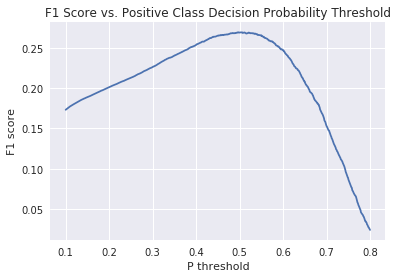

In [76]:

logreg = LogisticRegressionCV(cv = 5)

logreg.fit(X_tr_rs, y_tr_rs)




import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_te, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.80,1000)
model_val_probs = logreg.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores = []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(model_val_labels, y_val))
    
plt.plot(thresh_ps, f1_scores)
plt.title('F1 Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('F1 score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

## Trying LASSO for model 2

In [77]:
#Re-testing coefficients with this using lasso

X = df[['id', 'member_id', 'int_rate', 'installment', 'loan_amnt', 'annual_inc', 'dti',
       'revol_bal', 'revol_util', 'total_acc', 'open_acc', 'term', 'pub_rec']]
y = df['loan_status']

Text(0.5,1,'Heatmap of Features - Before LASSO')

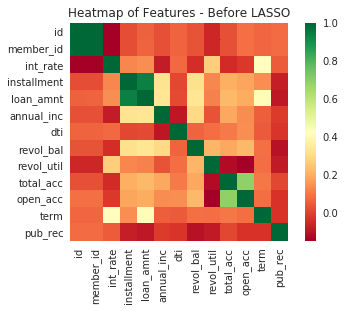

In [78]:
sns.heatmap(X.corr(), square=True, cmap='RdYlGn').set_title('Heatmap of Features - Before LASSO')

In [79]:
#Test_train_split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20, random_state=1)

In [80]:
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
#Apply the scaler to the train set
X_tr = std.transform(X_train)

#Apply the scaler to the test set
X_te = std.transform(X_test)

In [82]:
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.4, random_state=42) 
    


In [83]:
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.4, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_sample(X_tr, y_train)

logreg = LogisticRegressionCV(cv = 5)
logreg.fit(X_tr_rs, y_tr_rs)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [84]:
y_pred = logreg.predict(X_te)
print(logreg.score(X_te, y_test))


0.852287162753


In [85]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.87      0.92    162159
          1       0.18      0.49      0.27      9451

avg / total       0.92      0.85      0.88    171610



# Using LASSO

In [86]:
lr_model5 = Lasso(alpha = 1000000)
lr_model5.fit(X_tr_rs, y_tr_rs)

Lasso(alpha=1000000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
list(zip(X,lr_model5.coef_))

[('id', -0.0),
 ('member_id', -0.0),
 ('int_rate', 0.0),
 ('installment', 0.0),
 ('loan_amnt', -0.0),
 ('annual_inc', -0.0),
 ('dti', 0.0),
 ('revol_bal', -0.0),
 ('revol_util', 0.0),
 ('total_acc', -0.0),
 ('open_acc', -0.0),
 ('term', 0.0),
 ('pub_rec', -0.0)]

### Finding Optimal LASSO alpha

In [88]:
alphavec = 10**np.linspace(-3,9,27)
alphavec

array([  1.00000000e-03,   2.89426612e-03,   8.37677640e-03,
         2.42446202e-02,   7.01703829e-02,   2.03091762e-01,
         5.87801607e-01,   1.70125428e+00,   4.92388263e+00,
         1.42510267e+01,   4.12462638e+01,   1.19377664e+02,
         3.45510729e+02,   1.00000000e+03,   2.89426612e+03,
         8.37677640e+03,   2.42446202e+04,   7.01703829e+04,
         2.03091762e+05,   5.87801607e+05,   1.70125428e+06,
         4.92388263e+06,   1.42510267e+07,   4.12462638e+07,
         1.19377664e+08,   3.45510729e+08,   1.00000000e+09])

In [89]:


lr_model6 = LassoCV(alphas = alphavec, cv=5)
lr_model6.fit(X_tr_rs, y_tr_rs)

LassoCV(alphas=array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03,   2.89427e+03,   8.37678e+03,
         2.42446e+04,   7.01704e+04,   2.03092e+05,   5.87802e+05,
         1.70125e+06,   4.92388e+06,   1.42510e+07,   4.12463e+07,
         1.19378e+08,   3.45511e+08,   1.00000e+09]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [90]:
#Optimal Alpha
lr_model6.alpha_

0.001

## Plotting Coefficients

In [91]:

list(zip(X_train,lr_model6.coef_))

[('id', -0.0),
 ('member_id', -0.17995092801700732),
 ('int_rate', 0.09555358461963441),
 ('installment', 0.0),
 ('loan_amnt', -0.0022077877995676648),
 ('annual_inc', -0.013905769050245959),
 ('dti', 0.005607568230148522),
 ('revol_bal', -0.00047750877059259052),
 ('revol_util', -0.0),
 ('total_acc', -0.0039475708651490454),
 ('open_acc', 0.0009312563985957612),
 ('term', -0.0070727333614732189),
 ('pub_rec', -0.004323184085946969)]

features = X.columns

importances = rf.feature_importances_

indices = np.argsort(importances)


plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)), features[indices])

plt.xlabel('Relative Importance')

plt.show()

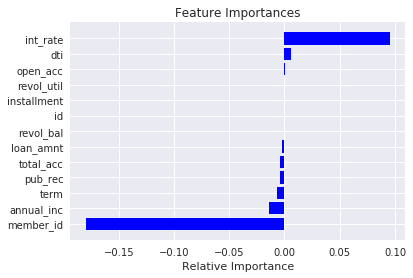

In [92]:
features = X.columns

importances = lr_model6.coef_

indices = np.argsort(importances)


plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)), features[indices])

plt.xlabel('Relative Importance')

plt.show()

## LARS Path

In [190]:
from sklearn.linear_model import lars_path

In [192]:

alphas, _, coefs = lars_path(X_tr_rs, y_tr_rs, method='lasso', verbose=True)

Computing regularization path using the LARS ...
.

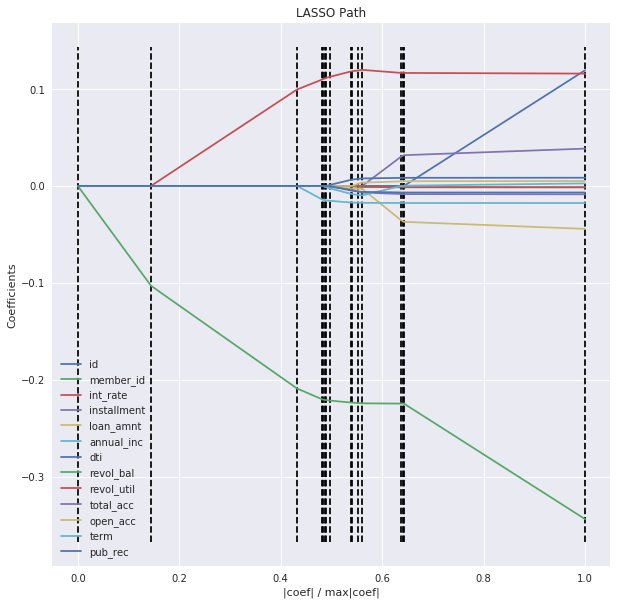

In [193]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

## Gaussian Naive Bayes

In [160]:


gauss = GaussianNB().fit(X_train, y_train)
y_test_pred = gauss.predict(X_test)
print('Naive Bayes (Gaussian) accuracy: %.4f' % accuracy_score(y_test, y_test_pred))

Naive Bayes (Gaussian) accuracy: 0.9449


In [ ]:
gauss = GaussianNB().fit(X_train, y_train)
y_test_pred = gauss.predict(X_test)
print('Naive Bayes (Gaussian) accuracy: %.4f' % accuracy_score(y_test, y_test_pred))

## Logistic Regression with Regularization

In [ ]:
model = LogisticRegression()
accuracy = np.mean(cross_val_score(model, X,y, cv=5))
print('Logistic Regression (L2 penalty) accuracy: %.3f' % accuracy)

# L1 and L2 are just two different forms of regularization. The form of
# what is added to the cost funtion is slightly different. L2 is default,
# Let's try L1 here, too. Different problems work better with different
# penalty forms.
model = LogisticRegression(penalty='l1')
accuracy = np.mean(cross_val_score(model, X,y, cv=5))
print('Logistic Regression (L1 penalty) accuracy: %.3f' % accuracy)

# Ok, let's also check different C values. C is just like alpha in Ridge Regression,
# It let's us fine tune how much regularization (how much shrinking) we will do on
# coeefficients. Default C is 1.0. Small C means more shrinking, tends to underfit,
# Large C means less shrinking, tends to overfit.
for C in np.linspace(0.05,100,10):
    model = LogisticRegression(penalty='l1', C=C)
    accuracy = np.mean(cross_val_score(model, X,y, cv=5))
    print('Logistic Regression (L1 penalty, C=%.2f) accuracy: %.3f' % (C,accuracy))

## KNN

In [ ]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
# test one K

knn = KNeighborsClassifier(n_neighbors =15)
print(cross_val_score(knn, X, y, cv=5, scoring='accuracy'))


In [ ]:
#KNN -Finding optimal n to maximize accuracy


accs = []
for n in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_tr,y_train)
    y_test_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accs.append(accuracy)
    print('KNN (n=%i) accuracy: %.4f' % (n,accuracy))

print('KNN max accuracy: %.4f' % max(accs))
plt.plot(range(1,20), accs)
plt.plot([0,1],[0,1],linestyle='--', color='gray')
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')